In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('./data/world_happiness_2019.csv')
data.sample(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
89,90,Azerbaijan,5.208,1.043,1.147,0.769,0.351,0.035,0.182
78,79,Turkey,5.373,1.183,1.360,0.808,0.195,0.083,0.106
26,27,Guatemala,6.436,0.800,1.269,0.746,0.535,0.175,0.078
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
27,28,Saudi Arabia,6.375,1.403,1.357,0.795,0.439,0.080,0.132


In [3]:
Score_Generocity_data = data[['Score','Generosity']]

## Min-max scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Transform the data
data_scaled = scaler.fit_transform(data[['Score','Generosity']])

normalized_data = pd.DataFrame(data_scaled, columns=['Score','Generosity'])
normalized_data

,Score,Generosity
0,1.000000,0.270318
1,0.965622,0.445230
2,0.956265,0.478799
3,0.944060,0.625442
4,0.942840,0.568905
...,...,...
151,0.097844,0.383392
152,0.076892,0.487633
153,0.071196,0.279152
154,0.046786,0.415194


## Abs-max scaling

In [5]:
from sklearn.preprocessing import MaxAbsScaler

# Initialize the scaler
scaler = MaxAbsScaler()
# Transform the data
data_scaled = scaler.fit_transform(data[['Score','Generosity']])

normalized_data = pd.DataFrame(data_scaled, columns=['Score','Generosity'])
normalized_data

,Score,Generosity
0,1.000000,0.270318
1,0.978247,0.445230
2,0.972326,0.478799
3,0.964603,0.625442
4,0.963831,0.568905
...,...,...
151,0.429141,0.383392
152,0.415884,0.487633
153,0.412280,0.279152
154,0.396834,0.415194


## Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
# Mean = 0 if with_mean=False
# Standard deviation = 1 if with_std=False
scaler = StandardScaler(with_mean=False, with_std=False)
# Transform the data
data_scaled = scaler.fit_transform(data[['Score','Generosity']])

standardized_data = pd.DataFrame(data_scaled, columns=['Score','Generosity'])
standardized_data

,Score,Generosity
0,7.769,0.153
1,7.600,0.252
2,7.554,0.271
3,7.494,0.354
4,7.488,0.322
...,...,...
151,3.334,0.217
152,3.231,0.276
153,3.203,0.158
154,3.083,0.235


## Robust scaling

In [7]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()
# Transform the data
data_scaled = scaler.fit_transform(data[['Score','Generosity']])

normalized_data = pd.DataFrame(data_scaled, columns=['Score','Generosity'])
normalized_data

,Score,Generosity
0,1.457012,-0.175627
1,1.353963,0.534050
2,1.325915,0.670251
3,1.289329,1.265233
4,1.285671,1.035842
...,...,...
151,-1.247256,0.283154
152,-1.310061,0.706093
153,-1.327134,-0.139785
154,-1.400305,0.412186


## Decimal scaling

In [8]:
def decimal_scaling(data):
    scaled_data = data.copy()  
    for column in data.columns:
        max_abs_value = np.abs(data[column]).max()
        # Calculate the scaling factor j (i.e., the number of digits)
        scaling_factor = np.ceil(np.log10(max_abs_value))
        # Perform decimal scaling by dividing by 10^j
        scaled_data[column] = data[column] / (10 ** scaling_factor)
    return scaled_data

In [9]:
# Transform the data
data_scaled = decimal_scaling(data[['Score','Generosity']])

normalized_data = pd.DataFrame(data_scaled, columns=['Score','Generosity'])
normalized_data

,Score,Generosity
0,0.7769,0.153
1,0.7600,0.252
2,0.7554,0.271
3,0.7494,0.354
4,0.7488,0.322
...,...,...
151,0.3334,0.217
152,0.3231,0.276
153,0.3203,0.158
154,0.3083,0.235


# Binning

## Equal-width binning

In [10]:
# Use pd.cut to create 4 equal-width bins
data['Group'] = pd.cut(data['Score'], bins=4)

# Check the bin ranges (categories)
print(data['Group'].cat.categories)

data.sample(5)

IntervalIndex([(2.848, 4.082], (4.082, 5.311], (5.311, 6.54], (6.54, 7.769]], dtype='interval[float64, right]')


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Group
51,52,Thailand,6.008,1.050,1.409,0.828,0.557,0.359,0.028,"(5.311, 6.54]"
100,101,Jordan,4.906,0.837,1.225,0.815,0.383,0.110,0.130,"(4.082, 5.311]"
42,43,Colombia,6.125,0.985,1.410,0.841,0.470,0.099,0.034,"(5.311, 6.54]"
92,93,China,5.191,1.029,1.125,0.893,0.521,0.058,0.100,"(4.082, 5.311]"
133,134,Ethiopia,4.286,0.336,1.033,0.532,0.344,0.209,0.100,"(4.082, 5.311]"


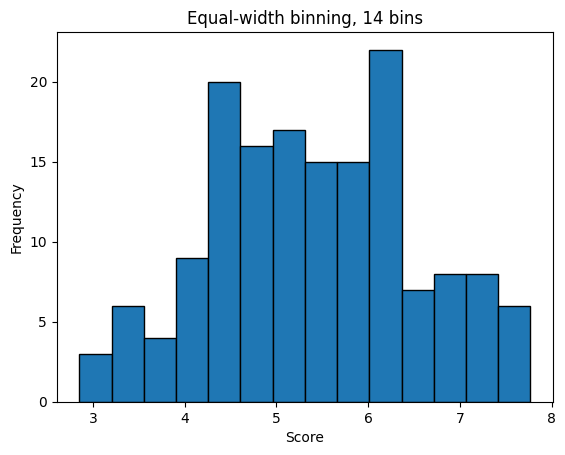

In [11]:
n_bins = 14
# Plot the histogram with the bin ranges
plt.hist(data['Score'], bins=n_bins, edgecolor='black')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title(f'Equal-width binning, {n_bins} bins');

## Equal-frequency binning

In [12]:
# Use pd.cut to create 4 equal-width bins
data['Group'] = pd.qcut(data['Score'], q=4)

# Check the bin ranges (categories)
print(data['Group'].cat.categories)

data.sample(5)

IntervalIndex([(2.8520000000000003, 4.544], (4.544, 5.38], (5.38, 6.184],
               (6.184, 7.769]],
              dtype='interval[float64, right]')


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Group
85,86,Kyrgyzstan,5.261,0.551,1.438,0.723,0.508,0.300,0.023,"(4.544, 5.38]"
56,57,Mauritius,5.888,1.120,1.402,0.798,0.498,0.215,0.060,"(5.38, 6.184]"
38,39,Trinidad & Tobago,6.192,1.231,1.477,0.713,0.489,0.185,0.016,"(6.184, 7.769]"
124,125,Bangladesh,4.456,0.562,0.928,0.723,0.527,0.166,0.143,"(2.8520000000000003, 4.544]"
113,114,Niger,4.628,0.138,0.774,0.366,0.318,0.188,0.102,"(4.544, 5.38]"


Text(0.5, 1.0, 'Equal-frequency binning, 14 bins')

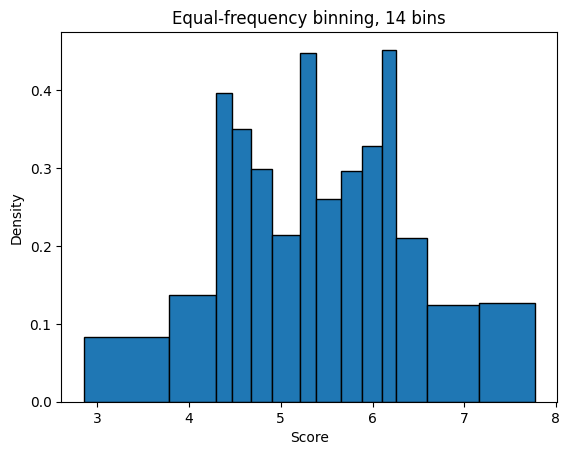

In [22]:
n_bins = 14
# Get the bin edges from pd.qcut
data['Group'] = pd.qcut(data['Score'], q=n_bins)
bin_edges = data['Group'].cat.categories.left.tolist() + [data['Group'].cat.categories.right[-1]]

# Plot the histogram with equal-frequency bins
# Density is the proportion of the total data that falls within that bin
plt.hist(data['Score'], bins=bin_edges, edgecolor='black', density=True)

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Density')
plt.title(f'Equal-frequency binning, {n_bins} bins')

## Custom binning

In [14]:
bins = np.linspace(data['Score'].min(), data['Score'].max(), num=5)

labels = ['Low', 'Medium', 'High', 'Very High']
data['Group'] = pd.cut(data['Score'], bins=bins, labels=labels, include_lowest=True)
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Group
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Very High
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Very High
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Very High
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Very High
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Very High
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Low
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Low
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Low
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Low


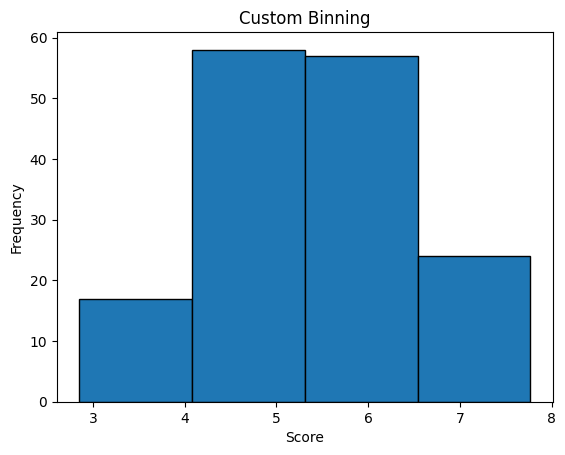

In [15]:
# Plot histogram using the bin edges from np.linspace
plt.hist(data['Score'], bins=bins, edgecolor='black')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Custom Binning')

# Set custom x-ticks at the middle of each bin with group labels
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin centers for labels

# Create custom labels with ranges
bin_ranges = [f'{label}: [{int(bins[i])}, {int(bins[i+1])}]' for i, label in enumerate(labels)]


# plt.xticks(bin_centers, labels, rotation=90);  


# Sampling

## Top sampling

In [16]:
percentage = 5
# Calculate percentage% of the total number of rows
n = int(len(data) * percentage / 100)
n = max(n,1)
# Select the top n rows based on 'Score'
top_rows = data.nlargest(n, 'Score')
top_rows

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Group
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Very High
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Very High
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Very High
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Very High
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Very High
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Very High
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,Very High


## Random sampling

In [17]:
percentage = 5
# Calculate percentage% of the total number of rows
n = int(len(data) * percentage / 100)
n = max(n,1)
# Select random n rows based on 'Score'
random_sample = data.sample(n)
random_sample

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Group
122,123,Mozambique,4.466,0.204,0.986,0.390,0.494,0.197,0.138,Medium
68,69,Philippines,5.631,0.807,1.293,0.657,0.558,0.117,0.107,High
117,118,Guinea,4.534,0.380,0.829,0.375,0.332,0.207,0.086,Medium
54,55,Estonia,5.893,1.237,1.528,0.874,0.495,0.103,0.161,High
72,73,Montenegro,5.523,1.051,1.361,0.871,0.197,0.142,0.080,High
87,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,Medium
67,68,Russia,5.648,1.183,1.452,0.726,0.334,0.082,0.031,High


## Stratified sampling

In [18]:
from sklearn.model_selection import train_test_split

test_size = .05

_, stratified_sample = train_test_split(data, test_size=test_size, stratify=data['Group'])
stratified_sample


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Group
136,137,Egypt,4.166,0.913,1.039,0.644,0.241,0.076,0.067,Medium
56,57,Mauritius,5.888,1.120,1.402,0.798,0.498,0.215,0.060,High
74,75,Croatia,5.432,1.155,1.266,0.914,0.296,0.119,0.022,High
73,74,Tajikistan,5.467,0.493,1.098,0.718,0.389,0.230,0.144,High
103,104,Gabon,4.799,1.057,1.183,0.571,0.295,0.043,0.055,Medium
106,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027,Medium
140,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033,Low
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Very High


## Undersampling

In [19]:
from imblearn.under_sampling import RandomUnderSampler

# Sample imbalanced data
toy_data = pd.DataFrame({
    'Feature': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'Class': [0, 0, 0, 0, 0, 0, 0, 1, 1]
})


"""
sampling_strategy=
    'majority': resample only the majority class;
    'not minority': resample all classes but the minority class;
    'not majority': resample all classes but the majority class;
    'all': resample all classes;
    'auto': equivalent to 'not minority'
"""

# Under-sampling to balance the dataset
undersample = RandomUnderSampler(sampling_strategy='majority')
X_res, y_res = undersample.fit_resample(toy_data[['Feature']], toy_data['Class'])

balanced_data = pd.DataFrame({'Feature': X_res['Feature'], 'Class': y_res})
balanced_data

,Feature,Class
1,1,0
2,2,0
7,7,1
8,8,1


## Oversampling

In [20]:
from imblearn.over_sampling import SMOTE

# Sample imbalanced data
toy_data = pd.DataFrame({
    'Feature': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Class': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
})

# Over-sampling using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(k_neighbors=2)
X_res, y_res = smote.fit_resample(toy_data[['Feature']], toy_data['Class'])

balanced_data = pd.DataFrame({'Feature': X_res['Feature'], 'Class': y_res})
balanced_data

,Feature,Class
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,1
8,8,1
9,9,1
